**Data Mining 6366 Project**

**Team Members:** <br>
Lesli Perez<br>
Jennifer Pedraza<br>
Rebecca Fernandez<br>
Ashley Gomez

In [ ]:
# importing libraries
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('vader_lexicon')


# set seed for reproducibility
random.seed(6366)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# read all given csv files
x_db = pd.read_csv("/content/X_test.csv")
x_train = pd.read_csv("/content/X_train.csv")
y_train = pd.read_csv("/content/y_train.csv")

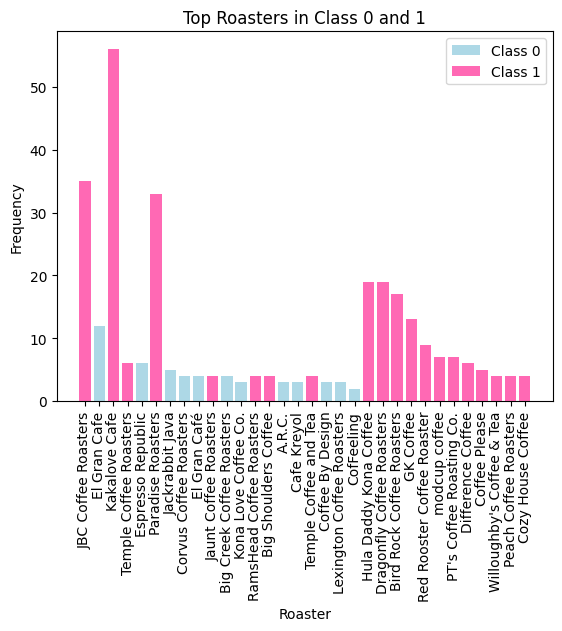

In [ ]:
roaster = x_train["roaster"]
classes = y_train["class"]

class_0_roasters = roaster[classes == 0]
class_1_roasters = roaster[classes == 1]

class_0_roaster_counts = class_0_roasters.value_counts().head(20)
class_1_roaster_counts = class_1_roasters.value_counts().head(20)

# Plotting
plt.bar(class_0_roaster_counts.index, class_0_roaster_counts.values, color='lightblue', label='Class 0')
plt.bar(class_1_roaster_counts.index, class_1_roaster_counts.values, color='hotpink', label='Class 1')

plt.xlabel('Roaster')
plt.ylabel('Frequency')
plt.title('Top Roasters in Class 0 and 1')
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [ ]:
#Making the roaster column into a categorical to integer using pandas
print(x_train.head())
x_traindum = pd.get_dummies(x_train, columns=['roaster'])

# print(x_traindum.head())
# print(x_testrrdum.head())
print(x_traindum.shape,'Roaster')

#Making the roast into dummies
x_traindumroast=pd.get_dummies(x_traindum, columns=['roast'])


# print(x_traindumroast.head())
# print(x_testrrdumroast.head())
print(x_traindumroast.shape,'Roast')


#Making the orgin into dummies
x_traindumroastorg=pd.get_dummies(x_traindumroast, columns=['origin'])

x_train = x_traindumroastorg

print(x_traindumroastorg.shape)
print(x_train.shape)

# print(x_traindumroastorg.head())
# print(x_testrrdumroastorg.head())

print(x_traindumroastorg.shape,'Origin')



   coffee_id                          roaster         roast    origin  \
0       1014                    Kakalove Cafe  Medium-Light    Taiwan   
1       1000                    Port of Mokha           NaN     Yemen   
2       1094  Simon Hsieh Aroma Roast Coffees        Medium     Kenya   
3        142              JBC Coffee Roasters  Medium-Light  Ethiopia   
4        647                      Roast House  Medium-Light  Ethiopia   

   100g_USD                                             review  
0     11.33  Delicate, fruit-forward. Blueberry, molasses, ...  
1     39.68  Deep yet soaring, vertically complex. Dried bl...  
2     12.04  Evaluated as espresso. Richly chocolaty, compl...  
3      5.51  Floral, bright, citrusy, balanced. Star jasmin...  
4      4.19  Delicate, sweetly spice-toned. Pink peppercorn...  
(620, 200) Roaster
(620, 204) Roast
(620, 229)
(620, 229)
(620, 229) Origin


In [ ]:
# split training data 80/20 for validation <3
# before splitting, join y_train to x_train as an extra column
# (making sure the y train rows are deleted along with null x train for consistency, since there is no ID in y_train)
# split 80/20 then make y_train and y_test by removing the last column

# merge x and y train
training_data = pd.concat([x_train, y_train], axis=1)

y_train = training_data.iloc[:, -1]
x_train = training_data.iloc[:, :-1]


In [ ]:

# split data
train_data, test_data = train_test_split(training_data, test_size=0.1, random_state=42)


# unmerge x and y train and x and y test
y_train = train_data.iloc[:, -1]
x_train = train_data.iloc[:, :-1]

y_test = test_data.iloc[:, -1]
x_test = test_data.iloc[:, :-1]
print(x_test.shape)
print(y_test.shape)

(62, 229)
(62,)


In [ ]:
reviews = training_data["review"]
sentiments = training_data["class"]

neg_rev = []
pos_rev = []

for review, sentiment in zip(reviews, sentiments):
    if sentiment == 0:
        neg_rev.append({"review": review})
    else:
        pos_rev.append({"review": review})

# Convert to DataFrame
neg_df = pd.DataFrame(neg_rev)
pos_df = pd.DataFrame(pos_rev)

len(neg_rev)

209

In [ ]:
# Remove punctuation and get word frequency from negative reviews
words = []
for entry in neg_rev:
    review = entry["review"]
    # Split the review into words
    review_words = review.split()
    # Remove punctuation
    for char in ",.;()'":
        review_words = [word.replace(char, "") for word in review_words]
    # Convert words to lowercase and add to the list
    words.extend([word.lower() for word in review_words])

# Get word frequency
word_frequency_neg = Counter(words)

# Add custom stopwords
stopwords = set(stopwords.words('english'))
custom_stopwords = ["cup", "the", "cup.", "notes", "structure", "finish", "finish.", "very", "long", "resonant", "hint", "long,", "finish", "on.", "go"]
stopwords.update(custom_stopwords)

# Remove stopwords from word frequency
for stopword in stopwords:
    if stopword in word_frequency_neg:
        del word_frequency_neg[stopword]

# Print the most common words
print(word_frequency_neg.most_common(20))



[('aroma', 207), ('mouthfeel', 203), ('sweet', 178), ('acidity', 163), ('chocolate', 156), ('cedar', 105), ('crisply', 76), ('almond', 74), ('crisp', 71), ('zest', 70), ('brisk', 69), ('cocoa', 68), ('richly', 67), ('sweetly', 62), ('satiny', 57), ('baking', 57), ('magnolia', 56), ('hazelnut', 54), ('dark', 54), ('gentle', 53)]


In [ ]:
# Remove punctuation and get word frequency from positive reviews
words = []
for entry in pos_rev:
    review = entry["review"]
    # Split the review into words
    review_words = review.split()
    # Remove punctuation
    for char in ",.;()'":
        review_words = [word.replace(char, "") for word in review_words]
    # Convert words to lowercase and add to the list
    words.extend([word.lower() for word in review_words])

# Get word frequency
word_frequency_pos = Counter(words)

# Remove stopwords from word frequency
for stopword in stopwords:
    if stopword in word_frequency_pos:
        del word_frequency_pos[stopword]

# Print the most common words
print(word_frequency_pos.most_common(20))

[('aroma', 417), ('mouthfeel', 401), ('acidity', 333), ('chocolate', 275), ('richly', 208), ('sweet', 208), ('cocoa', 192), ('juicy', 182), ('nib', 180), ('dark', 177), ('sweetly', 163), ('syrupy', 161), ('tart', 139), ('bright', 134), ('zest', 129), ('deeply', 108), ('sweet-tart', 106), ('balanced', 106), ('plush', 103), ('sandalwood', 102)]


In [ ]:
negative_words = []
for word in word_frequency_neg:
  if word not in word_frequency_pos:
    negative_words.append(word)
print(negative_words)

['leaf', 'chrysanthemum', 'prune', 'balsa', 'drive', 'raisin', 'gardenia-like', 'mild', 'simple', 'understated', 'nut-', 'honeysuckle-like', 'roasty-sweet', 'carob', 'golden', 'pert', 'crisp-toned', 'jolly', 'rancher', 'oregano', 'teriyaki', 'sauce', 'salty', 'brazil', 'baked', 'lean', 'bright-toned', 'cedar-like', 'grapey', 'berryish', 'slight', 'roasty', 'sweet-sour', 'yogurt-like', 'root-vegetable', 'brothy', 'cooked', 'root', 'vegetables', 'salty-edged', 'low-toned', 'salty/savory', 'briskly', 'roast-rounded', 'lily-', 'vanilla-like', 'roast-dominant', 'smoky-sweet', 'burned', 'barely', 'perceptible', 'heavy', 'persistent', 'lift', 'rather', 'tobacco-toned', 'vanilla-toned', 'herbed', 'nuts', 'herbs', 'magnolia-like', 'supporting', 'bakers', 'hip', 'smoke-toned', 'vanillin', 'little', 'light-bodied', 'hemp-seed', 'well-composed', 'sweet/savory', 'martini-like', 'mint', 'also', 'agreeably', 'table', 'malted', 'malt', 'last', 'lavendar', 'blind', 'assessment:', 'reappear', 'banana', 

In [ ]:
positive_words = []
for word in word_frequency_pos:
  if word not in word_frequency_neg:
    positive_words.append(word)
print(positive_words)

['soaring', 'vertically', 'lingering', 'multi-layered', 'honors', 'promise', 'passionfruit', 'graphite', 'softened', 'mineral', 'lingers', 'star', 'jasmine-like', 'layered', 'nectarine', 'vibrantly', 'juicy-bright', 'intricate', 'port', 'wine', 'forceful', 'exceptionally', 'ring', 'berry-', 'flower-driven', 'wildly', 'lot', 'like', 'eating', 'trifle', 'laced', 'complexly', 'mirror', 'coffees', 'resonance', 'elegantly', 'spice-driven', 'blood', 'winey', 'unorthodox', 'coherent', 'compelling', 'fennel', 'frond', 'rose-like', 'wild', 'almost', 'enliven', 'stand', 'undercurrents', 'contribute', 'harmoniously', 'predominate', 'attractive', 'passion', 'spicy-floral', 'buttery-smooth', 'enticingly', 'pomelo', 'sustains', 'aromatics', 'spicily', 'support', 'voluptuous', 'flavor-laden', 'superb', 'milk:', 'berry-driven', 'herb-suffused', 'petrichor', 'post-rain', 'retains', 'permeate', 'ready-to-drink', 'coffee', 'tested', 'cold', 'bing', 'orchid', 'tree', 'lush', 'mouth-filling', 'viscosity', 

In [ ]:
all_words = []

for entry in pos_rev:
    review = entry["review"]
    review_words = review.split()

    # Remove punctuation
    for char in ",.;()'":
        review_words = [word.replace(char, "") for word in review_words]

    # Convert words to lowercase and add to the list
    all_words.extend([word.lower() for word in review_words])


word_frequency = Counter(all_words)

# Remove stopwords from word frequency
for stopword in stopwords:
    if stopword in word_frequency:
        del word_frequency[stopword]

# Print the most common words
print(word_frequency.most_common(20))


[('aroma', 417), ('mouthfeel', 401), ('acidity', 333), ('chocolate', 275), ('richly', 208), ('sweet', 208), ('cocoa', 192), ('juicy', 182), ('nib', 180), ('dark', 177), ('sweetly', 163), ('syrupy', 161), ('tart', 139), ('bright', 134), ('zest', 129), ('deeply', 108), ('sweet-tart', 106), ('balanced', 106), ('plush', 103), ('sandalwood', 102)]


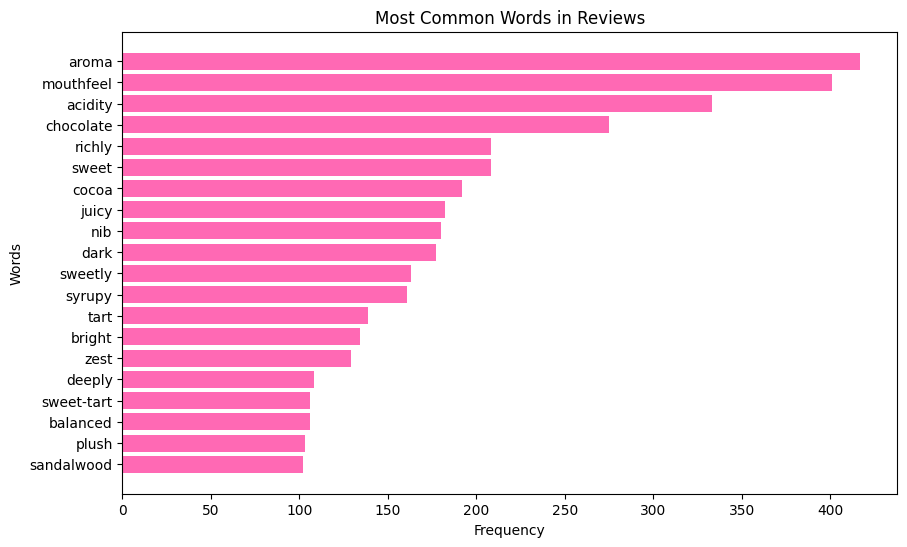

In [ ]:
most_common_words = word_frequency.most_common(20)

words, frequencies = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.barh(words, frequencies, color = "hotpink")
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Words in Reviews')
plt.gca().invert_yaxis()  # most frequent words on top
plt.show()

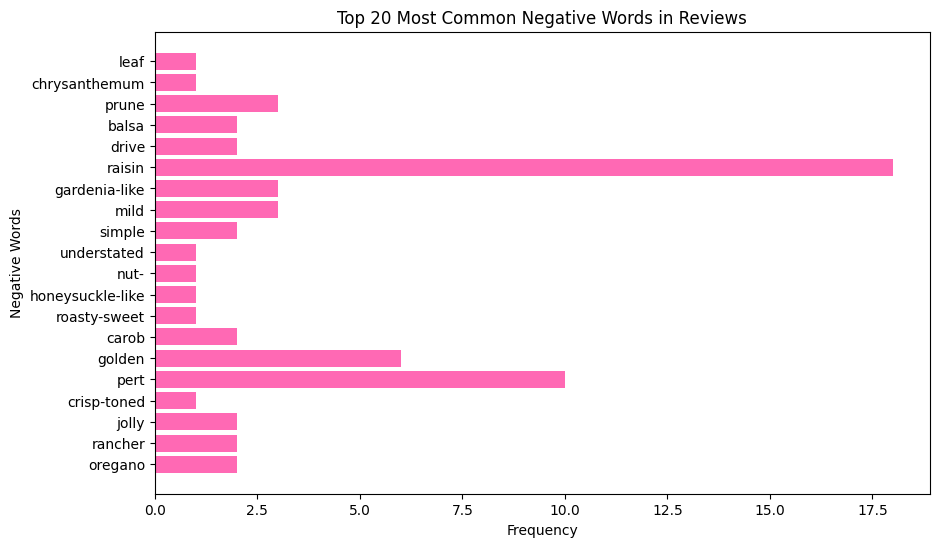

In [ ]:
top_negative_words = negative_words[:20]
top_negative_frequencies = [word_frequency_neg[word] for word in top_negative_words]

plt.figure(figsize=(10, 6))
plt.barh(top_negative_words, top_negative_frequencies, color="hotpink")
plt.xlabel('Frequency')
plt.ylabel('Negative Words')
plt.title('Top 20 Most Common Negative Words in Reviews')
plt.gca().invert_yaxis()  # higher frequency words on top
plt.show()

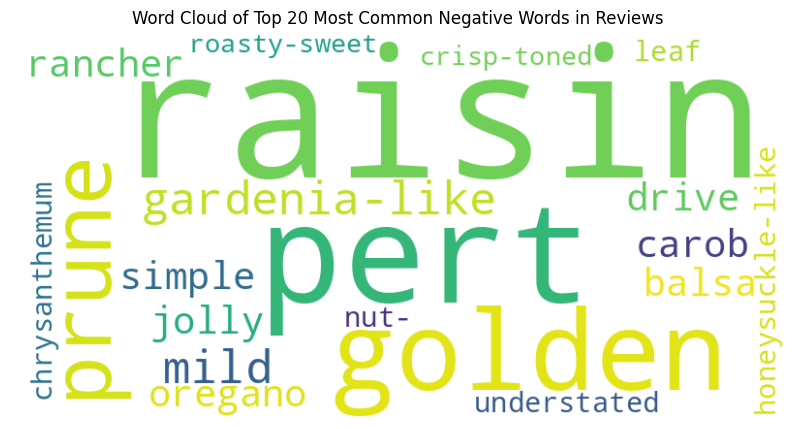

In [ ]:
from wordcloud import WordCloud
wordcloud_dict = {word: freq for word, freq in zip(top_negative_words, top_negative_frequencies)}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 20 Most Common Negative Words in Reviews')
plt.show()

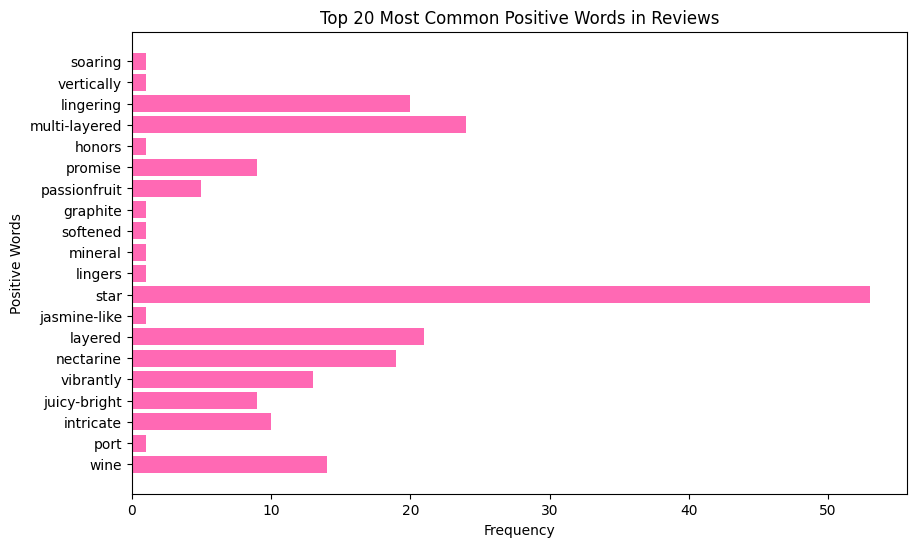

In [ ]:
top_positive_words = positive_words[:20]
top_positive_frequencies = [word_frequency_pos[word] for word in top_positive_words]

plt.figure(figsize=(10, 6))
plt.barh(top_positive_words, top_positive_frequencies, color="hotpink")
plt.xlabel('Frequency')
plt.ylabel('Positive Words')
plt.title('Top 20 Most Common Positive Words in Reviews')
plt.gca().invert_yaxis()  # higher frequency words on top
plt.show()

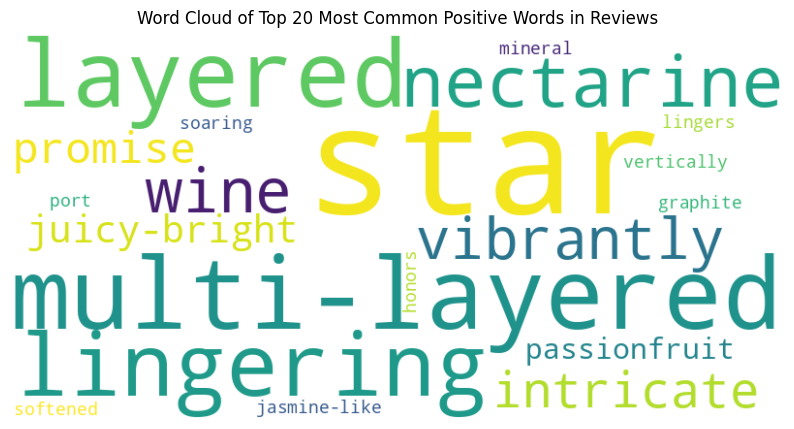

In [ ]:
from wordcloud import WordCloud
wordcloud_dict2 = {word: freq for word, freq in zip(top_positive_words, top_positive_frequencies)}

wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict2)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 20 Most Common Positive Words in Reviews')
plt.show()

In [ ]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    # Check if any negative words are present in the text
    negative_present = any(word in text.lower() for word in negative_words)
    if scores['pos'] > 0 and not negative_present:
        sentiment = 1  # Positive sentiment if positive score and no negative words
    else:
        sentiment = 0  # Negative sentiment otherwise
    return sentiment

print(x_train.size)

# apply get_sentiment function
x_train['sentiment'] = x_train['review'].apply(get_sentiment)
count = 0
for i, sentiment in enumerate(x_train["sentiment"]):
    if sentiment == 0:
        # print(x_train.iloc[i])
        count += 1

print("Total instances with sentiment 0:", count)

127782
Total instances with sentiment 0: 243


In [ ]:
x_train.head()

,coffee_id,100g_USD,review,roaster_1980 CAFE,roaster_94 Fresh Coffee,roaster_A.R.C.,roaster_Amavida Coffee Roasters,roaster_Argyle Coffee Roasters,roaster_Atom Coffee Roasters,roaster_Ba Yang Coffee,...,origin_Nicaragua,origin_Panama,origin_Peru,origin_Rwanda,origin_Taiwan,origin_Tanzania,origin_Thailand,origin_Uganda,origin_Yemen,sentiment
579,729,5.88,"Balanced, sweet-toned, floral. Tea rose, cocoa...",False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
56,742,4.85,"High-toned, sweetly tart. Bing cherry, cocoa n...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
615,898,9.24,"Rich-toned, deeply aromatic. Black currant, to...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
505,775,6.34,"Gently sweet-tart. Pomegranate, orange zest, a...",True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
228,797,3.82,"Delicate, sweet, quietly nuanced. Clover, oak,...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
# apply get_sentiment function
x_test['sentiment'] = x_test['review'].apply(get_sentiment)
count = 0
for i, sentiment in enumerate(x_test["sentiment"]):
    if sentiment == 0:
        # print(x_train.iloc[i])
        count += 1

print("Total instances with sentiment 0:", count)

x_test.head()
print(x_test.shape)

Total instances with sentiment 0: 21
(62, 230)


In [ ]:
print(x_train.columns)
# Printing the 'review' column from rows with sentiment column equal to 1
print('These are the Outstanding notes ',(x_train.loc[x_train['sentiment'] == 1, 'review']).head(10))

# Printing the 'review' column from rows with sentiment column equal to 0
print('These are the Average notes ' ,(x_train.loc[x_train['sentiment'] == 0, 'review']).head(10))

Index(['coffee_id', '100g_USD', 'review', 'roaster_1980 CAFE',
       'roaster_94 Fresh Coffee', 'roaster_A.R.C.',
       'roaster_Amavida Coffee Roasters', 'roaster_Argyle Coffee Roasters',
       'roaster_Atom Coffee Roasters', 'roaster_Ba Yang Coffee',
       ...
       'origin_Nicaragua', 'origin_Panama', 'origin_Peru', 'origin_Rwanda',
       'origin_Taiwan', 'origin_Tanzania', 'origin_Thailand', 'origin_Uganda',
       'origin_Yemen', 'sentiment'],
      dtype='object', length=230)
These are the Outstanding notes  579    Balanced, sweet-toned, floral. Tea rose, cocoa...
615    Rich-toned, deeply aromatic. Black currant, to...
478    Vibrant, richly sweet, clear-toned. Roasted ca...
368    Crisply sweet-tart. Passion fruit, lemon verbe...
363    High-toned, richly sweet and deep. Nectarine, ...
468    High-toned, balanced, deeply sweet. Pomelo, ja...
101    Tropically fruity, richly chocolaty. Dried blu...
590    Evaluated as espresso. Rose-like flowers, choc...
90     Rich-toned,

In [ ]:
print(x_train.shape)

(558, 230)


In [ ]:
n = x_train.nunique(axis=0)

print("Number of unique values in each column :\n",
      n)

Number of unique values in each column :
 coffee_id                  558
100g_USD                   229
review                     558
roaster_1980 CAFE            2
roaster_94 Fresh Coffee      2
                          ... 
origin_Tanzania              2
origin_Thailand              2
origin_Uganda                2
origin_Yemen                 2
sentiment                    2
Length: 230, dtype: int64


In [ ]:
x_train.columns

Index(['coffee_id', '100g_USD', 'review', 'roaster_1980 CAFE',
       'roaster_94 Fresh Coffee', 'roaster_A.R.C.',
       'roaster_Amavida Coffee Roasters', 'roaster_Argyle Coffee Roasters',
       'roaster_Atom Coffee Roasters', 'roaster_Ba Yang Coffee',
       ...
       'origin_Nicaragua', 'origin_Panama', 'origin_Peru', 'origin_Rwanda',
       'origin_Taiwan', 'origin_Tanzania', 'origin_Thailand', 'origin_Uganda',
       'origin_Yemen', 'sentiment'],
      dtype='object', length=230)

In [ ]:
#https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python#4.-Applications-of-Naive-Bayes-algorithm-
categorical = [var for var in x_train.columns if x_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['review']


F1 Measurment is 2a/2a+b+c  Aka 2(TP)/ 2(TP)+FP+FN

In [ ]:
x_train = x_train.drop(columns=["review"])
x_train = x_train.drop(columns=["coffee_id"])
x_test = x_test.drop(columns=["review"])
x_test = x_test.drop(columns=["coffee_id"])

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets
# Model training
model.fit(x_train, y_train)


GaussianNB()

In [ ]:

# Predict Output
predicted = model.predict([x_test.iloc[5]])
print(predicted)
print("Actual Value:", y_test.iloc[5])
print("Predicted Value:", predicted[0])


[1]
Actual Value: 0
Predicted Value: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

# print(x_test.shape)
# print(y_test.shape)

# print(y_test.head())
# print(x_test.head())

y_pred = model.predict(x_test)

# print(y_pred.size)
# print(y_test.size)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy for Model 1:", accuray)
print("F1 Score for Model 1:", f1)

print()



Accuracy for Model 1: 0.7419354838709677
F1 Score for Model 1: 0.7536490505605125



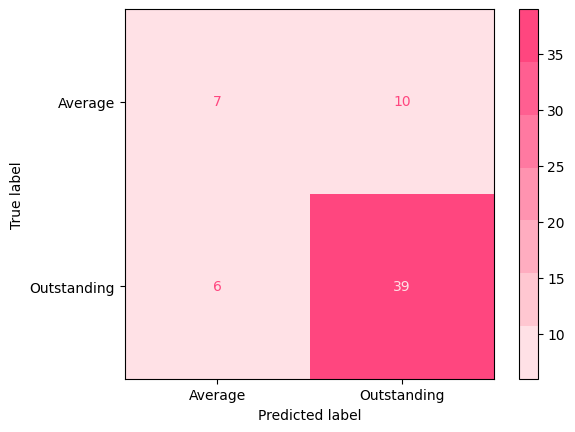

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
pink_cmap = ListedColormap(['#FFE1E6', '#FFC7D1', '#FFADC0', '#FF93B0', '#FF79A1', '#FF5F91', '#FF467F'])


# A matrix that can show true postitives and false negatives
labels = ["Average", "Outstanding"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=pink_cmap);
plt.show()


In [ ]:
#Making the roaster column into a categorical to integer using pandas
print(x_db.head())
x_testdum = pd.get_dummies(x_db, columns=['roaster'])

# print(x_traindum.head())
# print(x_testrrdum.head())
print(x_testdum.shape,'Roaster')

#Making the roast into dummies
x_testdumroast=pd.get_dummies(x_testdum, columns=['roast'])


# print(x_traindumroast.head())
# print(x_testrrdumroast.head())
print(x_testdumroast.shape,'Roast')


#Making the orgin into dummies
x_testdumroastorg=pd.get_dummies(x_traindumroast, columns=['origin'])

x_db = x_testdumroastorg

print(x_testdumroastorg.shape)
print(x_db.shape)

# print(x_traindumroastorg.head())
# print(x_testrrdumroastorg.head())

print(x_testdumroastorg.shape,'Origin')



   coffee_id                 roaster         roast    origin  100g_USD  \
0        360  Hula Daddy Kona Coffee  Medium-Light   Hawai'I     22.02   
1       1168  Durango Coffee Company  Medium-Light  Colombia      5.57   
2        652     Fumi Coffee Company         Light  Ethiopia      6.51   
3        183       Paradise Roasters         Light  Colombia     17.62   
4        332      Green Stone Coffee        Medium  Ethiopia      8.21   

                                              review  
0  Deep-toned, complexly layered, vibrantly aroma...  
1  Deeply pungent, richly sweet-savory. Dark choc...  
2  Elegant, delicate, sweetly tart. Bergamot, dri...  
3  Delicate, fruit- and floral-toned. Apricot, ho...  
4  Richly floral- and berry-toned, impeccably bal...  
(267, 128) Roaster
(267, 132) Roast
(620, 229)
(620, 229)
(620, 229) Origin


In [ ]:
# apply get_sentiment function
x_db['sentiment'] = x_db['review'].apply(get_sentiment)
count = 0
for i, sentiment in enumerate(x_db["sentiment"]):
    if sentiment == 0:
        # print(x_train.iloc[i])
        count += 1

print("Total instances with sentiment 0:", count)

x_db.head()
print(x_db.shape)
x_db = x_db.drop(columns=['review'])
x_db = x_db.drop(columns=['coffee_id'])

Total instances with sentiment 0: 264
(620, 230)


In [ ]:
# DO MODEL ON TESTING DATA
y_pred_test = model.predict(x_db)

# PRINT AS CSV
df = pd.DataFrame({'class': y_pred_test})
filename = "result.csv"
df.to_csv(filename, index=False)

pos = 0
neg = 0

for x in y_pred_test:
  if x == 0:
    neg += 1
  else:
    pos += 1

print("Total predictions:", len(y_pred_test))
print("Total positive:", pos)
print("Total negative:", neg)

Total predictions: 620
Total positive: 417
Total negative: 203
